# 단지번호 붙이기
- https://www.acmicpc.net/problem/2667

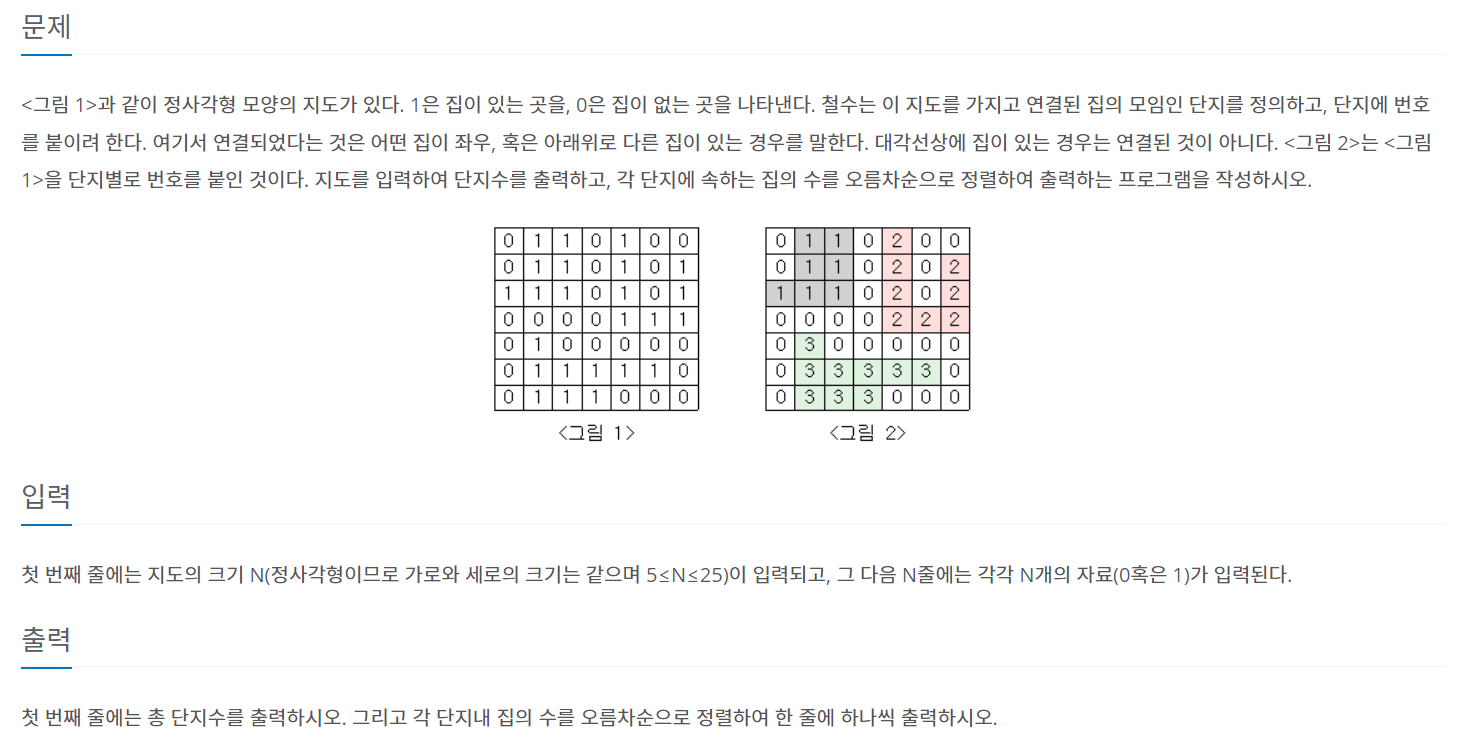

1. 집이 있는 곳(1)마다 상하좌우로 또 다른 집이 있는지 확인한다. 이미 방문한 경우, 방문처리 한다.
2. 계속해서 연결된 또 다른 집에서 연결된 집을 확인한다.
3. 연결된 집이 없을 때까지 과정을 반복한다.

In [9]:
from collections import deque

# 지도의 크기(정사각형)
n = int(input())

board = []
for _ in range(n):
    board.append(list(map(int, input())))
    
# 확인할 네 방향(상,하,좌,우)
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

ans = [] # 단지 정보를 담을 리스트
visited = [] # 방문처리를 위한 리스트

for i in range(n):
    for j in range(n):
        x, y = i, j
        # 집이 있는 경우, 확인하지 않은 집만 확인
        if board[x][y] == 1 and (x, y) not in visited:
            visited.append((x, y))
            queue = deque()
            queue.append((x, y))
        
            while queue:
                x, y = queue.popleft()
                # 현재 위치에서 네 방향으로의 위치 확인
                for k in range(4):
                    nx = x + dx[k]
                    ny = y + dy[k]
                    # 지도를 벗어난 경우 무시
                    if nx < 0 or ny < 0 or nx >= n or ny >= n:
                        continue
                    # 집이 없는 경우 무시
                    if board[nx][ny] == 0:
                        continue
                    # 해당 집을 처음 방문하는 경우에만 방문처리
                    if board[nx][ny] == 1 and (nx, ny) not in visited:
                        queue.append((nx, ny))
                        visited.append((nx, ny))
                        board[x][y] = board[nx][ny] = 2
            
            ans.append(len(visited))
            visited.clear()
            
print(len(ans))
ans.sort()
for i in ans:
    print(i)

7
0110100
0110101
1110101
0000111
0100000
0111110
0111000
3
7
8
9


# 토마토
- https://www.acmicpc.net/problem/7569

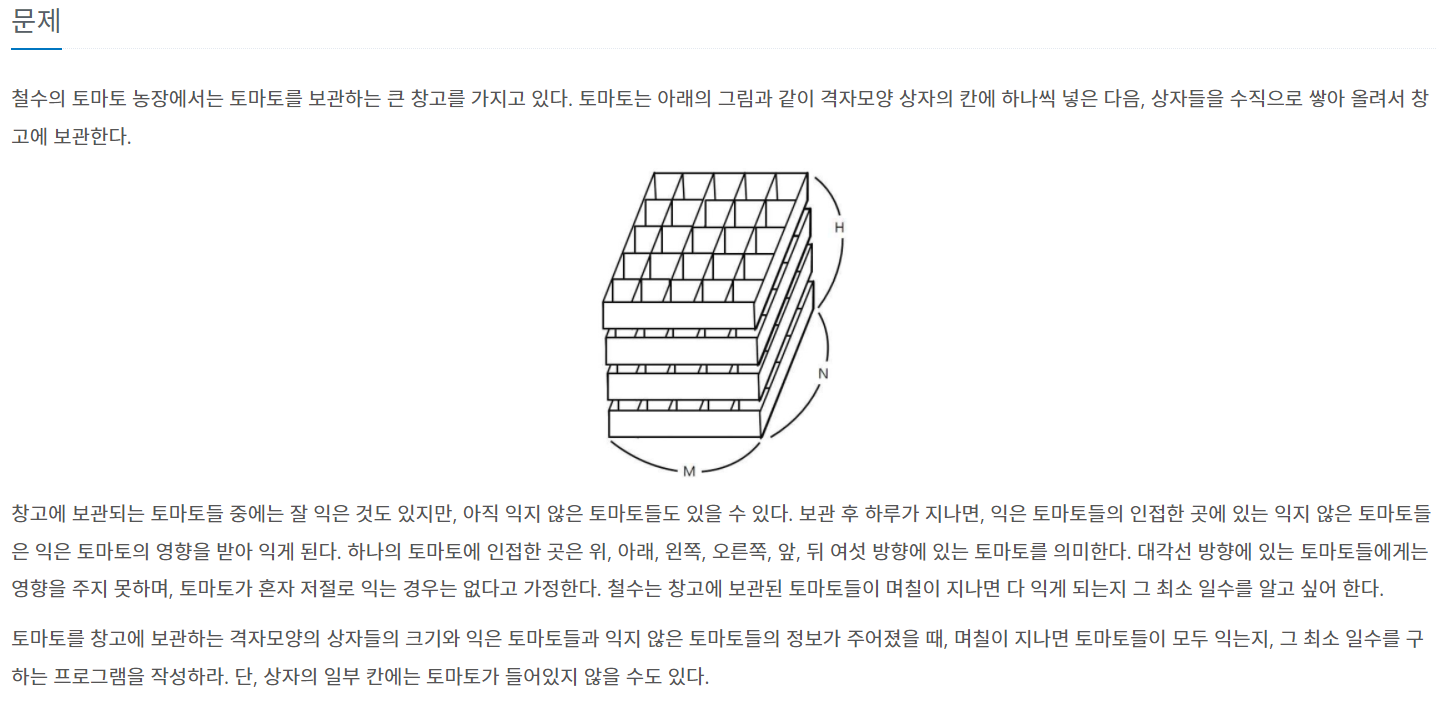

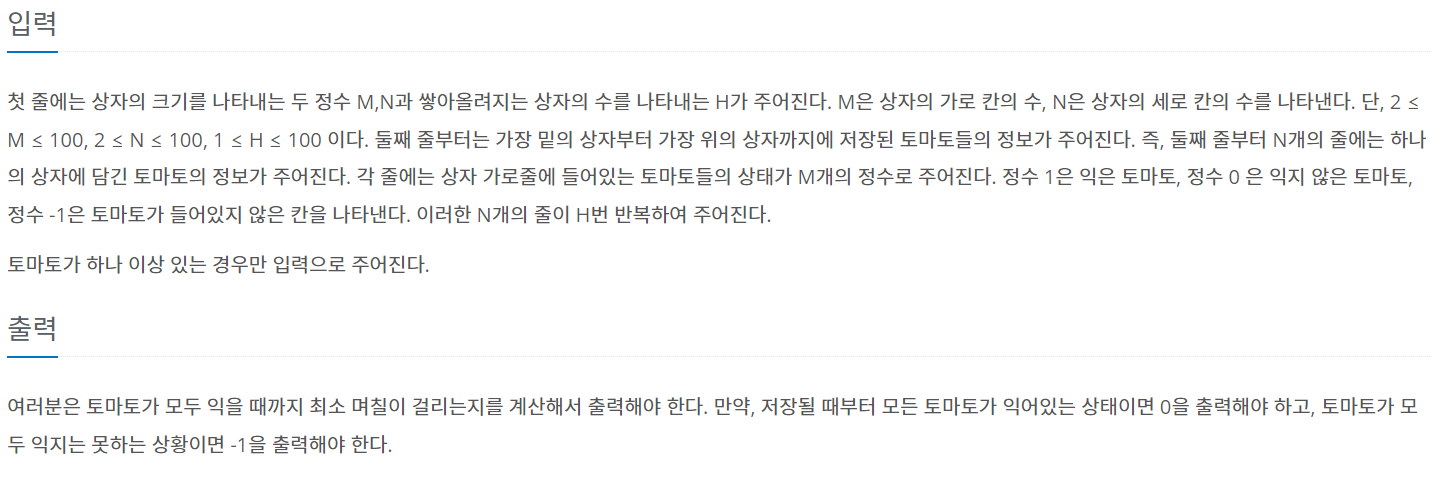

- 잘 익은 토마토(1), 익지 않은 토마토(0), 토마토가 들어 있지 않은 칸(-1)    
- 보관후 하루가 지나면, 익은 토마토들의 인접한 곳에 있는 익지 않은 토마토들은 익은 토마토의 영향을 받아 익게 된다.   
- 하나의 토마토에 인접한 곳은 위, 아래, 왼쪽, 오른쪽, 앞, 뒤에 있는 토마토를 의미한다.   
- 며칠이 지나면 토마토들이 모두 익는지, 그 최소 일수를 구하는 프로그램을 작성하라.   

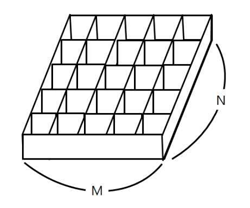

In [20]:
import sys
from collections import deque
# 상자의 가로, 세로, 쌓아올려지는 상자의 수
m, n, h = map(int, input().split())

box = []
queue = deque([])
for i in range(h):
    tomato = []
    for j in range(n):
        tomato.append(list(map(int, input().split())))
        for k in range(m):
            # 익은 토마토
            if tomato[j][k] == 1:
                queue.append([i, j, k])
    box.append(tomato)

# 확인할 방향 (상, 하, 좌, 우, 앞, 뒤)
dx = [1, -1, 0, 0, 0, 0]
dy = [0, 0, -1, 1, 0, 0]
dz = [0, 0, 0, 0, 1, -1]

while queue:
    x, y, z = queue.popleft()
    # 현재 위치에서 상하좌우앞뒤 확인
    for i in range(6):
        nx = x + dx[i]
        ny = y + dy[i]
        nz = z + dz[i]
        # 주어진 범위안에 있어야 함 & 익지 않은 토마토
        if 0 <= nx < h and 0 <= ny < n and 0 <= nz < m and box[nx][ny][nz] == 0:
            queue.append([nx, ny, nz])
            box[nx][ny][nz] = box[x][y][z] + 1
            
day = 0
for i in box:
    for j in i:
        for k in j:
            if k == 0:
                print(-1)
                sys.exit(0)
        day = max(day, max(j))

# 처음부터 익은 토마토가 존재해, 시작점이 1이기 때문에 day - 1
print(day-1)

5 3 2
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 0 0 0
0 0 1 0 0
0 0 0 0 0
4


# 빙산
- https://www.acmicpc.net/problem/2573

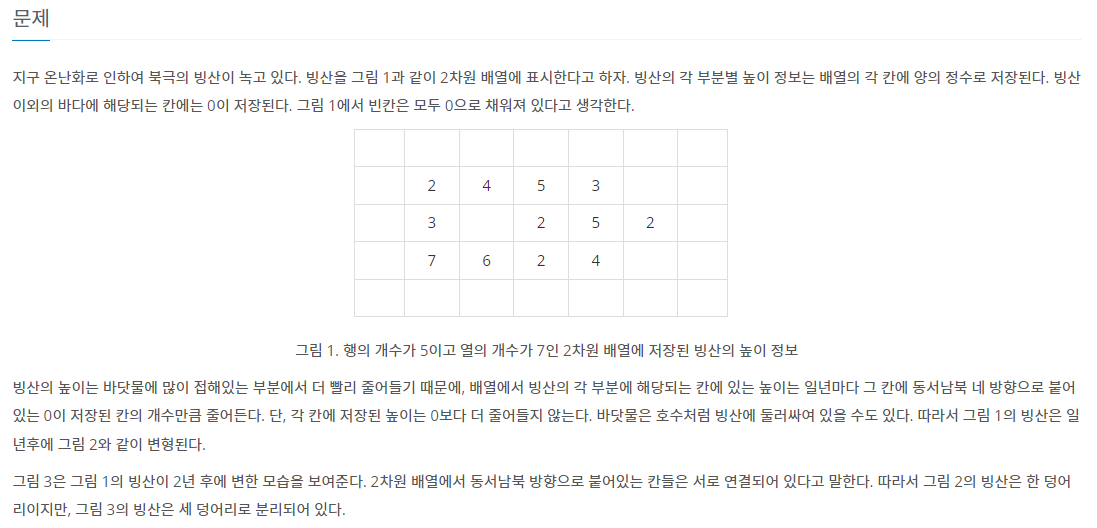

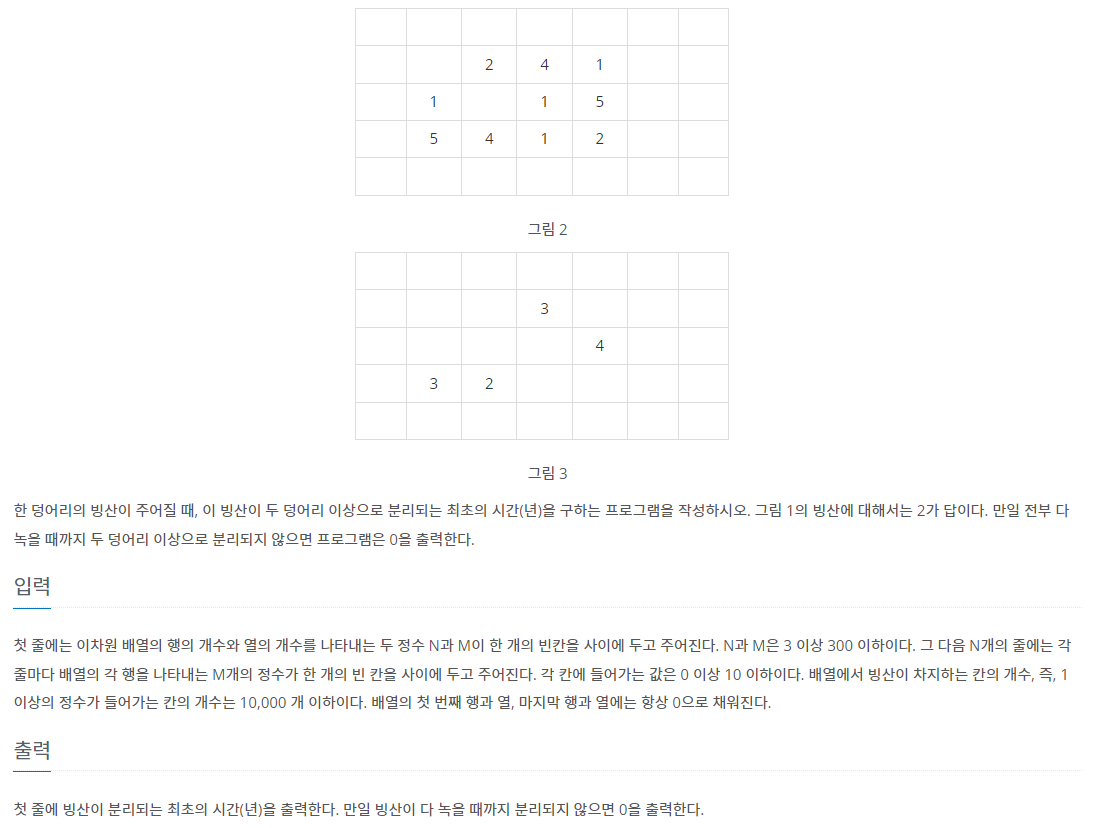

In [40]:
from collections import deque

# 동서남북
dx = [0, 0, 1, -1]
dy = [1, -1, 0, 0]

# 행, 열의 개수
n, m = map(int, input().split())

# 빙산 정보
graph = []
for i in range(n):
    graph.append(list(map(int, input().split())))

day= 0
check = False

def bfs(a,b):
    queue.append((a,b))
    while queue:
        x,y = queue.popleft()
        visited[x][y] = True
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            if 0 <= nx < n and 0 <= ny < m:
                if graph[nx][ny] != 0 and visited[nx][ny] == False:
                    visited[nx][ny] = True
                    queue.append((nx,ny))
                elif graph[nx][ny] == 0:
                    count[x][y] += 1
    return 1

# 빙산이 분리될때까지 돌아줌
while True:
    visited = [[False]*m for _ in range(n)]
    count = [[0]*m for _ in range(n)]
    result = []
    for i in range(n):
        for j in range(m):
            if graph[i][j] != 0 and visited[i][j] == False:
                result.append(bfs(i,j))
    # 빙산을 깍아줌           
    for i in range(n):
        for j in range(m):
            graph[i][j] -= count[i][j]
            if graph[i][j] < 0:
                graph[i][j] = 0
    
    if len(result) == 0: # 빙산이 다없어질때까지 분리가 되지않으면 break
        break
    if len(result) >= 2: # 빙산이 분리되면 break
        check = True
        break
    day += 1

if check:        
    print(day)
else:
    print(0)

5 7
0 0 0 0 0 0 0
0 2 4 5 3 0 0
0 3 0 2 5 2 0
0 7 6 2 4 0 0
0 0 0 0 0 0 0
2
